In [1]:
from segment_anything import SamAutomaticMaskGenerator, SamPredictor, sam_model_registry
import cv2
import matplotlib.pyplot as plt
import numpy as np

/homes/e34960/anaconda3/envs/patchdiff/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([0, 0, 0, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)


In [3]:
sam = sam_model_registry["vit_h"](checkpoint="sam_models/sam_vit_h_4b8939.pth")
sam.to(device='cuda')

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0): Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU()
        )
      )
      (1): Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        

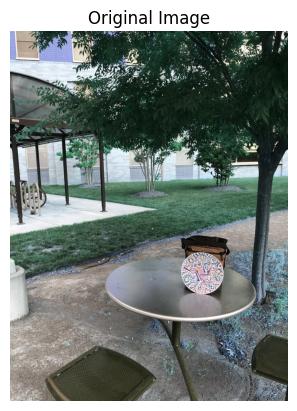

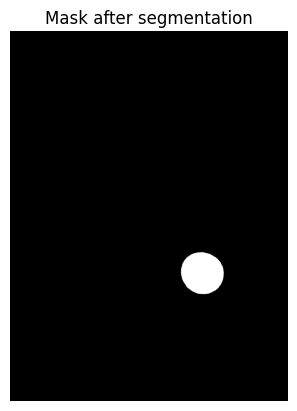

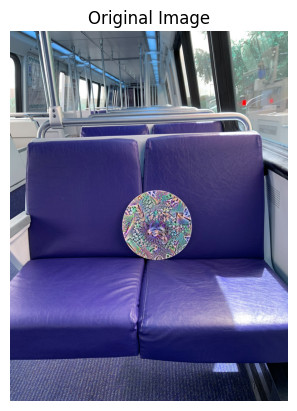

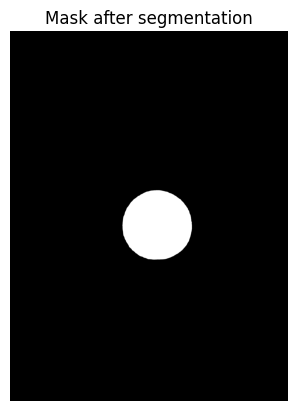

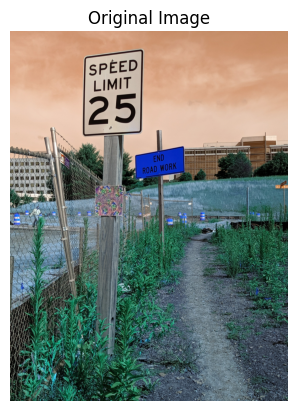

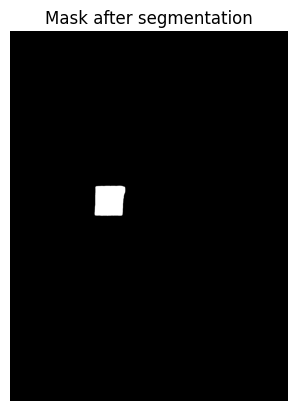

In [19]:
points = [[2100,2600],[1600,2100],[1100,1800]]

for i in range(3):
        image  = cv2.imread('apricot_ds/imgs/img_{}.png'.format(i))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # print("GT shape : ", image.shape)
        plt.imshow(image)
        plt.title('Original Image')
        plt.axis('off')
        plt.show()
        #sam = sam_model_registry["vit_h"](checkpoint="sam_models/sam_vit_h_4b8939.pth")
        #sam.to(device='cuda')
        #
        predictor = SamPredictor(sam)
        predictor.set_image(image)

        input_point = np.array([points[i]])
        input_label = np.array([1])

        masks, scores, logits = predictor.predict(
            point_coords=input_point,
            point_labels=input_label,
            multimask_output=True,
        )

        max_scores_idx = np.argmax(scores)
        mask = masks[max_scores_idx]
        # print(mask.shape)
        plt.imshow(mask, cmap='gray')
        plt.title('Mask after segmentation')
        plt.axis('off')
        plt.show()

        cv2.imwrite("apricot_ds/results/mask_{}.png".format(i), np.float32(mask * 255.0))

        #### Inverted Mask
        inv_mask = cv2.bitwise_not(np.uint8(mask * 255.0))
        cv2.imwrite("apricot_ds/results/inv_mask_{}.png".format(i), np.float32(inv_mask))